# Grading:
Total: 21/20
1. 6/6.
2. 2/2.
3. 4/4.
4. 5/4. Bonus points for using vectorised operations (avoiding for loops).
5. 4/4.

In [1]:
from pylab import *

## Problem 1

In [2]:
# Initial data
S = 1
K = 1.2
sigma = 0.5
T = 1
rp = 0.03

### Part A: Binomial Tree

In [3]:
def payoff_function(S, K, call_or_put):
    # payoff for single stock price, not vectorized
    if call_or_put == 'call':
        return max(S - K, 0)
    elif call_or_put == 'put':
        return max(K - S, 0)
    else:
        raise Exception("Specify option type: 'call' or 'put'") # reject all other option types
        
payoff = vectorize(payoff_function)

def binomial_tree(payoff, n, rp, sigma, S, K, T):
    up = exp(sigma*sqrt(T/n))
    down = 1/up
    r = rp*T/n
    p = (exp(r) - down)/(up - down)
    
    S_array = [S*(up**(n-i))*(down**i) for i in arange(0,n+1)]
    C = zeros((n+1, n+1))
    C[:,n] = payoff(S_array, K, 'call')
    k = 0
    
    for i in range(n-1, -1, -1): # backward induction
        C[0:n-k, i] = e**(-r)*(p*C[0:n-k, i+1] + (1-p)*C[1:n-k+1, i+1])
        k += 1
    return C[0,0]

### Part B: Black-Scholes Formula

In [4]:
from scipy.stats import norm

def black_scholes(r, sigma, S, K, T):
    x = (log(S/K) + (r + 0.5*sigma**2)*T)/(sigma*sqrt(T))
    return S*norm.cdf(x) - K*exp(-r*T)*norm.cdf(x - sigma*sqrt(T))

Testing:

In [5]:
binomial_tree(payoff, 1000, rp, sigma, S, K, T) - black_scholes(rp, sigma, S, K, T)

1.7806531095565514e-05

In [6]:
binomial_tree(payoff, 10000, rp, sigma, S, K, T) - black_scholes(rp, sigma, S, K, T)

1.6988844957488425e-06

### Part C: Loglog-plot

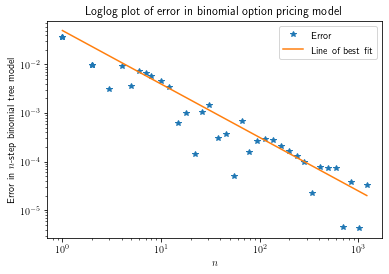

In [7]:
option_price_limit = black_scholes(rp, sigma, S, K, T)

def error(n):
    return abs(binomial_tree(payoff, n, rp, sigma, S, K, T) - option_price_limit)

error_vec = vectorize(error)

x = array(1.2**arange(1,40),dtype=int)

figure()
rc('text', usetex=True)
title('Loglog plot of error in binomial option pricing model')
xlabel(r'$n$')
ylabel(r'Error in $n$-step binomial tree model')
loglog(x,error_vec(x),'*',label='Error')
loglog(x,0.05/x**1.1,label='Line of best fit') # fit a straight line, done by hand
legend()
show()

We do roughly obtain a straight line with slope -1.1, which suggests that the convergence rate is about 1, or equivalently $$E(n) \sim 0.05x^{-1}$$
where $E(n)$ is the difference between the results from the $n$-step binomial tree and the Black-Scholes model.
## Problem 2
See hand-in.
## Problem 3

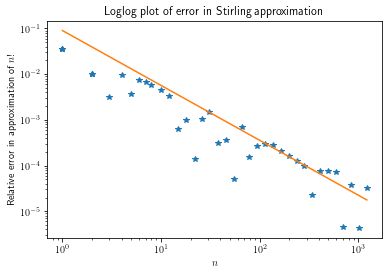

In [8]:
from scipy import special

def f(n):
    return sqrt(2*pi*n)*(n/exp(1))**n

def error_stirling(n):
    return abs((special.factorial(n) - f(n))/f(n))
               
error_vec = vectorize(error)

x = array(1.2**arange(1,40),dtype=int)

figure()
rc('text', usetex=True)
title('Loglog plot of error in Stirling approximation')
xlabel(r'$n$')
ylabel(r'Relative error in approximation of $n!$')
loglog(x,error_vec(x),'*',label='Error')
loglog(x,0.09/x**1.2, label='Line of best fit') # fit a straight line
show()

We roughly obtain a straight line of slope -1.2, which suggests a convergence rate of 1. This means
$$\frac{n!-f(n)}{f(n)} \sim \frac{0.09}{n}\text{ , or }$$ 
$$n!-f(n) \sim f(n) \frac{0.09}{n}.$$ with $f(n) = \sqrt{2\pi n}\left(\frac{n}{e}\right)^n.$ Rearranging:
$$n!\sim f(n)\left[1 + \frac{0.09}{n}\right]$$
and this yields the approximate next-order term in Stirling's formula. 

The exact next-order term is $\frac{1}{12n}.$ 
## Problem 4

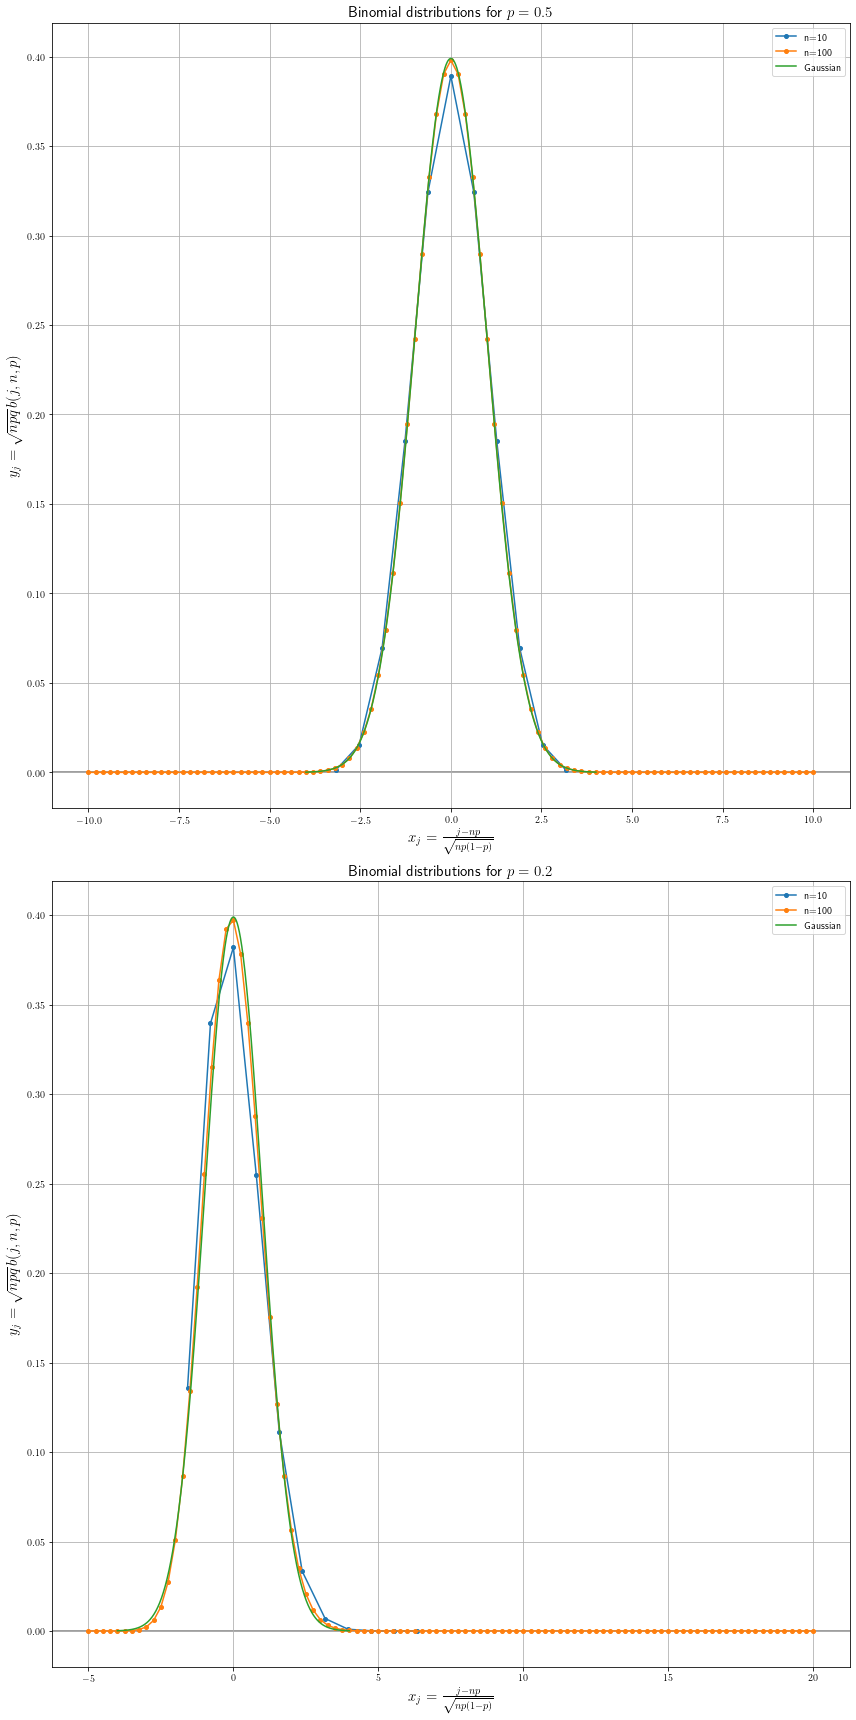

In [9]:
def binomial_distrib(j,n,p):
    return special.binom(n,j)*(p**j)*(1-p)**(n-j)

def plot_arrays(n,p):
    # returns correct x, y arrays for plot
    x = array(arange(0,n+1) - n*p)/sqrt(n*p*(1-p))
    y = array(sqrt(n*p*(1-p))*binomial_distrib(arange(0,n+1),n,p))
    return x,y


xx = linspace(-4,4,1000)

def gauss(x):
    return exp(-0.5*x**2)/sqrt(2*pi)

fig = plt.figure(figsize=(12,24))
rc('mathtext', fontset='cm')

ax1 = fig.add_subplot(211)
ax1.plot(plot_arrays(10,0.5)[0], plot_arrays(10,0.5)[1],'o-', markersize=4, label='n=10')
ax1.plot(plot_arrays(100,0.5)[0], plot_arrays(100,0.5)[1],'o-', markersize=4, label='n=100')
ax1.plot(xx, gauss(xx), label='Gaussian')
ax1.set_xlabel(r'$x_j = \frac{j - np}{\sqrt{np(1-p)}}$', fontsize=15)
ax1.set_ylabel(r'$y_j = \sqrt{npq}\,b(j,n,p)$', fontsize=15)
ax1.axhline(color='gray', zorder=-1) # horizontal axis
ax1.set_title(r'Binomial distributions for $p=0.5$', fontsize=15)
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(212)
ax2.plot(plot_arrays(10,0.2)[0], plot_arrays(10,0.2)[1],'o-', markersize=4, label='n=10')
ax2.plot(plot_arrays(100,0.2)[0], plot_arrays(100,0.2)[1],'o-', markersize=4, label='n=100')
ax2.plot(xx, gauss(xx), label='Gaussian')
ax2.set_xlabel(r'$x_j = \frac{j - np}{\sqrt{np(1-p)}}$', fontsize=15)
ax2.set_ylabel(r'$y_j = \sqrt{npq}\,b(j,n,p)$', fontsize=15)
ax2.axhline(color='gray', zorder=-1) # horizontal axis
ax2.set_title(r'Binomial distributions for $p=0.2$', fontsize=15)
ax2.grid()
ax2.legend()

plt.tight_layout()

The plots above suggest that the centered binomial distribution with normalized variance converges to the standard Gaussian for large $n$, and that this convergence is independent of $p$. This can be seen as a consequence of the central limit theorem, with the binomial distribution arising as a sum of independent, identically distributed random variables.
## Problem 5

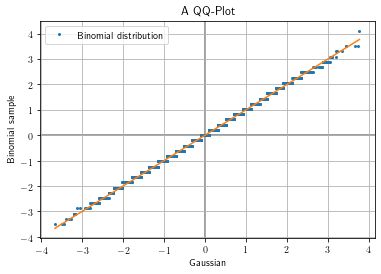

In [10]:
N = 10000 # sample size
n = 100 # number of trials

seed(2)
J = binomial(n,0.4, N)
X = (J - mean(J))/std(J)
gauss = normal(size=N)

figure()
title('A QQ-Plot')
plot(sort(gauss),sort(X),'o',markersize=2, label='Binomial distribution')
plot(sort(gauss),sort(gauss))
xlabel('Gaussian')
ylabel('Binomial sample')
grid()
axhline(color='gray', zorder=-1)
axvline(color='gray', zorder=-1)
legend()
show()

The sample points mostly lie close to the line $y = x.$ From this we can conclude that the samples are distributed normally.The plot points only diverge significantly from the Gaussian distribution after the third quantiles, indicating divergence from the normal in rare events.

## References
Nemes, Gergő (2010), "On the Coefficients of the Asymptotic Expansion of n!", Journal of Integer Sequences, 13 (6)